### 파이썬을 이용한 웹 데이터 수집(크롤링=스크래핑) 과정

1. 문서 내용 읽어오기 : urllib 패키지 - urlopen() 접속 - read() 데이터 읽어오기
    - text 속성을 사용해서 데이터를 읽어 올 수도 있음


2. 문서에서 원하는 내용 추출하기(파싱)
    - BeautifulSoup 패키지 사용 - find/findAll() 함수 사용

#### urllib 패키지 - url을 넘어주면 데이터를 텍스트 형태로 반환(기본 내장패키지)
* urllib2, urllib3 다른 버전 사용


In [1]:
## 파이썬에서 HTTP 요청을 보내주는 모듈 : requests(기본 내장 모듈)
import requests

In [4]:
url = "http://www.tistory.com"
response = requests.get(url) # 서버측으로 요청 신호를 보냄(get 방식으로 요청)
response.status_code # 서버에게 요청 해 받은 응답 결과 코드(응답 성공 : 200, 응답 오류 : 400번대 코드 - 클라이언트 오류/ 500번대 오류 - 서버의 오류)
response.text

'\n\t<!doctype html>\n\t<html lang="ko">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta property="og:url" content="https://www.tistory.com">\n\t\t<meta property="og:site_name" content="TISTORY">\n\t\t<meta property="og:title" content="TISTORY">\n\t\t<meta property="og:description" content="나를 표현하는 블로그를 만들어보세요.">\n\t\t<meta property="og:image" content="//t1.daumcdn.net/tistory_admin/static/images/openGraph/opengraph.png">\n\t\t<title>TISTORY</title>\n\t\t<link rel="shortcut icon" href="//t1.daumcdn.net/tistory_admin/static/top/favicon.ico">\n\t\t<link rel="apple-touch-icon" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/180x180.png">\n\t\t<link rel="apple-touch-icon" sizes="76x76" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/76x76.png">\n\t\t<link rel="apple-touch-icon" sizes="120x120" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/120x120.png">\n\t\t<link rel="apple-touch-icon" sizes="152x152" href="//t1.daumcdn.net/tistory_admin/static/ima

In [7]:
r = requests.get("https://www.google.co.kr")
print(r)
print(len(r.text))
print((r.text))

<Response [200]>
13236
<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="VkXfOhyt6LgKxv9voJ5snw==">(function(){window.google={kEI:'vNgIYYGQNcfv-Qa5z7uoBw',kEXPI:'0,772215,1,530320,56873,954,5105,206,4804,2316,383,246,5,1354,5250,1122516,1197724,558,328985,51223,16115,28684,17572,1325,3533,1362,283,9007,3030,4744,12835,4020,978,13228,3847,4192,6430,14528,4516,2779,919,6673,1279,2212,530,149,1103,840,2196,4101,109,3390,15,606,2025,1775,520,1704,12966,3227,2845,7,12354,5096,7876,5037,2854,555,906,2,3555,3784,9358,3,576,4385,2075,148,12289,1686,4,1528,2304,1236,5803,4684,2012,4069,14308,2658,4242,2459,656,30,13628,2305,638,1494,5586,10535,665,5821,2536,4094,17,2239,882,6,908,3,3541,1,8995,5266,449,1814,283,912,5992,12526,2,1394,2806,1715,2,3057,5439,5526,1931,

In [8]:
# 네이버 사이트에 requests 모듈을 이용해 접속하고 응답코드를 출력 해보기
import requests
url = "http://naver.com"
response = requests.get(url)
response.status_code

200

#### 파라미터
- 파라미터란? 
    - 사이트의 문서를 요청할 때 서버로 전달되는 정보
- 함수의 파라미터처럼 문서를 찾기 위한 정보를 전달하게 되는데 그 정보를 파라미터라고 함


- https://sports.news.naver.com/news?oid=477&aid=0000312064
- params = {'param1':'value1', 'param2':'value2'}
- res = requests.get(url, params=params)

In [11]:
url1 = 'https://sports.news.naver.com/news?oid=477&aid=0000312064'
url = 'https://sports.news.naver.com/news'
params = {'oid':477,'aid':'0000312064'}
res = requests.get(url,params=params)
res1 = requests.get(url1, params=params)
print('status code : ', res.status_code)
print('status code : ', res1.status_code)

status code :  200
status code :  200


#### urllib 패키지 이용한 서버 요청
- urllib 서브패키지 requests의 urlopen() 모듈을 이용

In [12]:
from urllib.request import urlopen

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
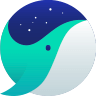
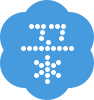

In [15]:
url = "http://www.naver.com"
res = urlopen(url)
print(res) # 서버에서 넘겨준 데이터를 인스턴스 객체로 가지고 있는 모양새임
print(res.read())

#### 문서에서 원하는 내용 추출하기 (파싱)

- html 문서에서 원하는 내용 추출
    - BeautifulSoup 라이브러리 사용
        - 아나콘다(주피터노트북)는 기본 포함되어 있는 패키지
        - 파이참은 설치해서 사용해야 함
            - File/Settings 메뉴 → Project Interpreter에서 "bs4" 검색
            - [Install Package] 버튼을 클릭 → bs4 설치
        - pip install bs4 (터미널에서 실행)
    - 주로 사용하는 함수 : find() / findAll() 함수

In [16]:
import bs4 # 아나콘다는 이미 이 패키지가 설치되어 있음(but 기본패키지는 아님)

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
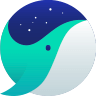
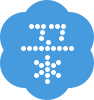

In [21]:
url = "http://www.naver.com"
res = urlopen(url)
bs_obj = bs4.BeautifulSoup(res,'html.parser') # 반환 결과가 html 형태로 반환
# print(bs_obj)
print(bs_obj.prettify()) # 들여쓰기를 해서 계층적인 구조로 출력 / 가독성이 높음
print(type(bs_obj))

#### bs4 메소드인 find() / findAll() 함수에 대해 정리

- find() : 선택자에 의해서 찾은 객체중 첫 번째 요소를 반환
- findAll()/find_all() : 선택자에 의해서 찾은 모든 요소를 리스트로 반환

In [32]:
# 문자열
html_str ="<html><div>hello</div><div>hello!!!!!!!!!></div></html>"

In [36]:
# 문자열을 bs object로 변환
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")
print(type(bs_obj))
print(bs_obj)

<class 'bs4.BeautifulSoup'>
<html><div>hello</div><div>hello!!!!!!!!!&gt;</div></html>


In [34]:
# find() 이용해서 div 태그 반환받기
print(bs_obj.find("div"))
print(bs_obj.find("div").text)

<div>hello</div>
hello


In [35]:
# findAll() 이용해서 div 태그 반환받기
bs_obj.findAll("div")

[<div>hello</div>, <div>hello!!!!!!!!!&gt;</div>]

### findAll() 예제

In [37]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

In [38]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")
print(type(bs_obj))

<class 'bs4.BeautifulSoup'>


In [40]:
ul = bs_obj.find("ul")
print(ul)
print(type(ul))

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>
<class 'bs4.element.Tag'>


In [41]:
lis = ul.findAll('li')
lis

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]

In [42]:
type(lis)
lis[0].text # 리스트기 때문에 인덱싱해서 .text 속성 사용

'hello'

In [43]:
for li in lis :
    print(li.text)

hello
bye
welcome


In [44]:
html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

In [45]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")
print(type(bs_obj))

<class 'bs4.BeautifulSoup'>


In [47]:
ul = bs_obj.find("ul",{"class":"reply"})
ul

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>

In [57]:
ul = bs_obj.find("ul",{"class":"reply"})
bs_obj.find(class='reply') # 에러 발생; class라는 파라미터를 안 만들었기 때문에

# ul

SyntaxError: invalid syntax (<ipython-input-57-c5c572e7cbc5>, line 2)

In [48]:
lis = ul.findAll("li")
for li in lis :
    print(li.text)

ok
no
sure


In [49]:
uls = bs_obj.find_all("ul")
uls

[<ul class="greet">
 <li>hello</li>
 <li>bye</li>
 <li>welcome</li>
 </ul>,
 <ul class="reply">
 <li>ok</li>
 <li>no</li>
 <li>sure</li>
 </ul>]

In [50]:
html_str = """
<html>
    <body>
        <h1 id='title'>Hello Python</h1>
        <p id="crawling">웹 크롤링</p>
        <p id="parsing">파싱</p>
    </body>
</html>"""

In [52]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")
# 소스가 달라지므로 새로운 객체 생성 필요

In [54]:
bs_obj.find("p",{"id":"parsing"}).text
# 태그 선택("p")후 속성 매칭 진행

'파싱'

In [56]:
bs_obj.find(id='title')
# id 속성 자체를 매칭
bs_obj.find(id='title').text

'Hello Python'

### 형제노드 찾기

In [73]:
html_str = """
<html>
    <body>
        <h1>파이썬 프로그래밍</h1>
        <p>웹 페이지 분석</p><p>크롤링</p><p>파싱</p>        
    </body>
</html>
"""

In [74]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [77]:
p1 = bs_obj.find("p")
p1

<p>웹 페이지 분석</p>

In [79]:
print(p1.next_sibling)
p1.next_sibling.next_sibling # . 연산자 이용해서 체인 형식으로 속성을 연결할 수 있음

<p>파싱</p>

### 속성값 추출하기 (a 태그의 href 속성을 추출)

- 사이트의 코드를 확인한 후 어떻게 찾아가야 하는지를 알아야 추출할 수 있음

In [80]:
html_str = """
<html>
    <body>
        <ul class="ko">
            <li><a href="https://www.naver.com/">네이버</a></li>
            <li><a href="https://www.daum.net/">다음</a></li>
        </ul>
        <ul class="sns">
            <li><a href="https://www.goole.com/">구글</a></li>
            <li><a href="https://www.facebook.net/">페이스북</a></li>
        </ul>
    </body>
</html>
"""

In [81]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [82]:
a_t = bs_obj.find('a')
a_t

<a href="https://www.naver.com/">네이버</a>

In [84]:
print(a_t['href'])
print(a_t.text)

https://www.naver.com/
네이버


In [91]:
# 모든 a 태그의 href 주소 얻어오기
a_ts = bs_obj.findAll('a')
a_ts

[<a href="https://www.naver.com/">네이버</a>,
 <a href="https://www.daum.net/">다음</a>,
 <a href="https://www.goole.com/">구글</a>,
 <a href="https://www.facebook.net/">페이스북</a>]

In [93]:
lis = []
for a_t in a_ts :
    print(a_t['href'])
    lis.append(a_t['href'])
lis

https://www.naver.com/
https://www.daum.net/
https://www.goole.com/
https://www.facebook.net/


['https://www.naver.com/',
 'https://www.daum.net/',
 'https://www.goole.com/',
 'https://www.facebook.net/']

In [109]:
html_str = """
<html>
   <body>
    	<div id="wrap">
        	<div id="mainMenuBox">                	
                <ul>  
                    <li><a href="#">패션잡화</a></li>    
                    <li><a href="#">주방용품</a></li>                     	          
                    <li><a href="#">생활건강</a></li>
                    <li><a href="#">DIY가구</a></li>
                </ul>
            </div>
        	<div>
            	<table>
                	<tr><td><img src="shoes1.jpg"></td>
                    	  <td><img src="shoes2.jpg"></td>
                    	  <td><img src="shoes3.jpg"></td></tr>
                    <tr id="prdName"><td>솔로이스트<br>걸리쉬 리본단화</td>
                    	  <td>맥컬린<br>그레이가보시스트랩 펌프스</td>
                          <td>맥컬린<br>섹슈얼인사이드펌프스</td></tr>
                    <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
                </table>
            </div>
            <div>
            	<div class="box">
                	<h4>공지사항</h4>
                    <hr>
<a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br>
                    <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br>
                    <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>                               
                </div>
                <div class="box">
                    <h4>커뮤니티</h4>
                    <hr>
                    <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br>
                    <a href="#">[가구] : 헌집 새집 베스트 가구</a><br>
                    <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br>
                 </div>
            </div>            
        </div>
    </body>
</html>"""

In [110]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [111]:
## selector : select() 함수를 사용할 수 있음
for i in bs_obj.select('a[href]') :
    print(i.text)

패션잡화
주방용품
생활건강
DIY가구
[배송] : 무표배송 변경 안내 18.10.20
[전시] : DIY 가구 전시 안내 18.10.31
[판매] : 11월 특가 상품 안내 18.11.05
[레시피] : 살 안찌는 야식 만들기
[가구] : 헌집 새집 베스트 가구
[후기] : 배송이 잘못 됐어요 ㅠㅠ


In [113]:
bs_obj.select('div #mainMenuBox ul') # 리스트 형태로 반환

[<ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>]

In [114]:
bs_obj.select("#wrap > div")

[<div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>,
 <div>
 <table>
 <tr><td><img src="shoes1.jpg"/></td>
 <td><img src="shoes2.jpg"/></td>
 <td><img src="shoes3.jpg"/></td></tr>
 <tr id="prdName"><td>솔로이스트<br/>걸리쉬 리본단화</td>
 <td>맥컬린<br/>그레이가보시스트랩 펌프스</td>
 <td>맥컬린<br/>섹슈얼인사이드펌프스</td></tr>
 <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
 </table>
 </div>,
 <div>
 <div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>
 </div>]

In [116]:
bs_obj.select('.box:nth-child(2) a[href]')

[<a href="#">[레시피] : 살 안찌는 야식 만들기</a>,
 <a href="#">[가구] : 헌집 새집 베스트 가구</a>,
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a>]